# Projet 5 : Optimisez la gestion des données d'une boutique avec R ou Python
<div>
<img src="attachment:logo.png" width="400"/>
</div>

<div>
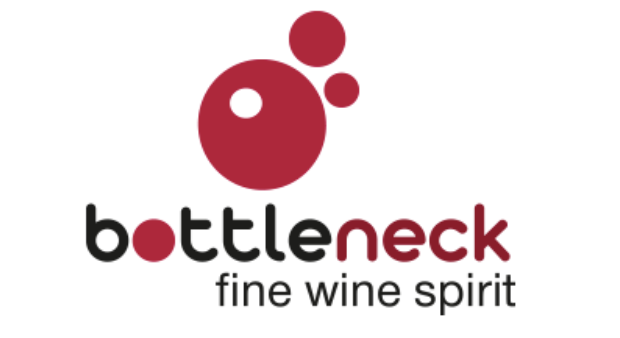
</div>

Pour ce projet je dois :  
* Créer une dataframe à partir des 3 fichiers envoyé par Laurent
* Calculer le chiffre d'affaire par produit et des ventes en ligne
* Faire une analyse univariée des prix et traiter les outliers (valeurs aberrantes)

### Sommaire

* [Nettoyage des dataframes et jointures](#chapter1)
    * [Fichier 'erp.xlsx' ](#section_1_1)
    * [Fichier 'liaison.xlsx'](#section_1_2)
    * [Fichier 'web.xlsx'](#section_1_3)
    * [Jointures](#section_1_4)
* [Calcul du chiffre d'affaires](#chapter2)
    * [Calcul du chiffre d'affaires par produit](#section_2_1)
    * [Calcul du chiffre d'affaires des ventes en ligne](#section_2_2)
* [Analyse univariée des prix](#chapter3)
* [Traitement des outliers](#chapter4)
    

# Nettoyage des dataframes et jointures <a class="anchor" id="chapter1"></a>

Pour pouvoir utiliser mes dataframes, je dois préalablement vérifier les données (doublons, valeurs manquantes) afin de pouvoir faire des jointures et obtenir ma dataframe finale qui me permettra d'effectuer mes calculs.

Je vais travailler sur 3 fichiers xlsx :  
* **'erp.xlxs'**    (références produit, prix de vente et état des stocks)
* **'liaison.xlxs'** (fichier de Sylvie)
* **'web.xlxs'**  (informations des produits commercialisés en ligne)

### Fichier 'erp.xlsx' <a class="anchor" id="section_1_1"></a>

In [1]:
# Ouverture des librairies 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Ouverture du fichier 'erp.xlsx' 
df_erp = pd.read_excel('erp.xlsx')

In [3]:
# Aperçu de la dataframe
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [4]:
# Taille de la dataframe
df_erp.shape

(825, 5)

In [5]:
# Aperçu des informations de la dataframe
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [6]:
# Description de la dataframe
df_erp.describe()

,product_id,onsale_web,price,stock_quantity
count,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.869091,32.415636,26.496970
std,902.644635,0.337506,26.795849,45.892422
min,3847.000000,0.000000,5.200000,0.000000
25%,4348.000000,1.000000,14.600000,1.000000
50%,4907.000000,1.000000,24.400000,11.000000
75%,5805.000000,1.000000,42.000000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


In [7]:
# Calcul du nombre de doublons
df_erp.duplicated().sum()

0

In [8]:
# Calcul du nombre de valeurs nulles dans chaque colonne
df_erp.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

Le fichier ne contient pas de doublons ni de valeurs nulles. 

### Fichier 'liaison.xlsx' <a class="anchor" id="section_1_2"></a>

In [9]:
# Ouverture du fichier liaison
df_liaison = pd.read_excel ('liaison.xlsx')

In [10]:
# Aperçu de la dataframe
df_liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [11]:
# Taille de la dataframe
df_liaison.shape

(825, 2)

In [12]:
# Affichage des informations de la dataframe
df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [13]:
# Recherche du nombre de doublons 
df_liaison.duplicated().sum()

0

In [14]:
# Calcul du nombre de valeurs manquantes par colonne
df_liaison.isnull().sum()

product_id     0
id_web        91
dtype: int64

In [15]:
# Création d'une dataframe qui contient toutes les valeurs nan
df_nan = df_liaison[df_liaison.isna().any(axis=1)]

In [16]:
# Aperçu de la dataframe
df_nan

,product_id,id_web
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
...,...,...
817,7196,NaN
818,7200,NaN
819,7201,NaN
820,7203,NaN


Je conserve cette dataframe afin de pouvoir par la suite la mettre à jour avec le client.  

### Fichier 'web.xlsx' <a class="anchor" id="section_1_3"></a>

In [17]:
# Ouverture du fichier 'web.xlsx' où je remplace le nom de la colonne 'sku' par 'id_web'
df_web = pd.read_excel ('web.xlsx', names =['id_web','virtual', 'downloadable', 'rating_count', 'average_rating',
       'total_sales', 'tax_status', 'tax_class', 'post_author', 'post_date',
       'post_date_gmt', 'post_content', 'post_title', 'post_excerpt',
       'post_status', 'comment_status', 'ping_status', 'post_password',
       'post_name', 'post_modified', 'post_modified_gmt',
       'post_content_filtered', 'post_parent', 'guid', 'menu_order',
       'post_type', 'post_mime_type', 'comment_count'])

In [18]:
# Aperçu de la dataframe
df_web.head()

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


La colonne id_web contient une ligne 'bon-cadeau-25-euros' qui n'a pas la même référence que les autres produits mais qu'il faut conserver car il doit être compris dans le calcul du chiffre d'affaires.

In [19]:
# Affichage de la taille de la dataframe
df_web.shape

(1513, 28)

In [20]:
# Affichage des informations de la dataframe
df_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_web                 1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [21]:
# Calcul du nombre de doublons
df_web.duplicated().sum()

82

In [22]:
# Création d'une nouvelle colonne qui va contenir le nombre de valeurs manquantes par ligne
df_web['doublon'] = df_web.isna().sum(axis=1)

# Tri de la colonne 'doublon' par ordre croissant
df_web = df_web.sort_values('doublon')

# Copie des doublons dans une nouvelle dataframe
df_doublon = df_web.drop_duplicates('id_web', keep='last')

# Suppression des doublons qui ont le plus de valeurs manquantes
df_web = df_web.drop_duplicates('id_web', keep='first')

# Suppression de la colonne 'doublon'
df_web = df_web.drop('doublon', axis=1)

In [23]:
df_doublon.head()

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,doublon
1258,15095,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-09-06 11:04:31,...,2020-05-30 10:39:26,2020-05-30 08:39:26,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,6
1244,15346,0,0,0,0.0,16.0,NaN,NaN,2.0,2018-07-31 11:49:05,...,2020-02-13 17:00:01,2020-02-13 16:00:01,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,6
1254,13904,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-09-06 10:07:35,...,2020-04-24 21:48:21,2020-04-24 19:48:21,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,6
1256,12494,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-09-06 10:34:05,...,2020-04-24 21:48:49,2020-04-24 19:48:49,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,6
1255,14141,0,0,0,0.0,1.0,NaN,NaN,2.0,2018-09-06 10:21:59,...,2020-07-23 16:35:02,2020-07-23 14:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,6


In [24]:
df_web.head()

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
490,12194,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-09-13 16:31:51,...,la-preceptorie-maury-blanc-2015,2020-06-16 14:35:02,2020-06-16 12:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
491,16328,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-09-13 16:43:39,...,parce-freres-banyuls-rimage-2018,2020-07-23 09:30:19,2020-07-23 07:30:19,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
492,14469,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-09-13 16:51:09,...,parce-freres-cotes-du-roussillon-villages-homm...,2020-08-27 10:19:56,2020-08-27 08:19:56,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
493,16034,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-09-25 15:35:26,...,clos-du-mont-olivet-chateauneuf-du-pape-2007,2020-08-21 14:25:03,2020-08-21 12:25:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


En regardant les colonnes 'post-type' et 'post_mime_type' on remarque que ces doublons correspondent à l'image du produit sur le site. 
Je fait une jointure entre df_web et df_doublon pour ne pas perdre les informations de la dataframe df_doublon.

In [25]:
# Affichage des valeurs unique de la colonne 'post_type' dans la dataframe df_web
df_web.post_type.unique()

array(['product'], dtype=object)

In [26]:
# Affichage des valeurs unique de la colonne 'post_type' dans la dataframe df_doublon
df_doublon.post_type.unique()

array(['attachment', nan], dtype=object)

In [27]:
# Je crée une nouvelle dataframe en ne conservant que les colonnes utiles
df_web = df_web[['id_web','total_sales', 'post_name','tax_status', 'tax_class','post_type', 'post_mime_type']]
df_doublon = df_doublon[['id_web','total_sales','post_name', 'tax_status', 'tax_class','post_type', 'post_mime_type']]

In [28]:
# Aperçu de la dataframe
df_doublon.head()

,id_web,total_sales,post_name,tax_status,tax_class,post_type,post_mime_type
1258,15095,0.0,chili-errazuriz-cabernet-sauvignon-2015,NaN,NaN,attachment,image/jpeg
1244,15346,16.0,albert-mann-pinot-noir-grand-h-2017,NaN,NaN,attachment,image/jpeg
1254,13904,0.0,australie-maverick-breechens-blend-2012,NaN,NaN,attachment,image/jpeg
1256,12494,0.0,australie-harkham-wines-old-vines-2011,NaN,NaN,attachment,image/jpeg
1255,14141,1.0,australie-maverick-trial-hill-riesling-2010,NaN,NaN,attachment,image/jpeg


In [29]:
# Je vérifie la taille de ma dataframe avant de faire la jointure
df_doublon.shape

(715, 7)

In [30]:
# Je renomme mes colonnes pour plus de lisibilité
df_doublon.rename(columns={'post_type': 'post_type_db', 'post_mime_type': 'post_mime_type_db'})


,id_web,total_sales,post_name,tax_status,tax_class,post_type_db,post_mime_type_db
1258,15095,0.0,chili-errazuriz-cabernet-sauvignon-2015,NaN,NaN,attachment,image/jpeg
1244,15346,16.0,albert-mann-pinot-noir-grand-h-2017,NaN,NaN,attachment,image/jpeg
1254,13904,0.0,australie-maverick-breechens-blend-2012,NaN,NaN,attachment,image/jpeg
1256,12494,0.0,australie-harkham-wines-old-vines-2011,NaN,NaN,attachment,image/jpeg
1255,14141,1.0,australie-maverick-trial-hill-riesling-2010,NaN,NaN,attachment,image/jpeg
...,...,...,...,...,...,...,...
1010,11587,0.0,whisky-lord-elcho,NaN,NaN,attachment,image/jpeg
1011,9636,0.0,whisky-wemyss-the-hive-12-ans,NaN,NaN,attachment,image/jpeg
1005,11585,1.0,whisky-wemyss-the-hive,NaN,NaN,attachment,image/jpeg
999,12587,3.0,champagne-egly-ouriet-grand-cru-brut-rose,NaN,NaN,attachment,image/jpeg


In [31]:
# Je fais ma jointure afin de garder les informations de ma dataframe df_doublon dans la dataframe df_web
df_web_final = pd.merge(df_web,df_doublon, on= 'id_web', how ='left')

In [32]:
# Je vérifie la taille de ma dataframe
df_web_final.shape

(715, 13)

In [33]:
# Aperçu de la dataframe
df_web_final.head()

,id_web,total_sales_x,post_name_x,tax_status_x,tax_class_x,post_type_x,post_mime_type_x,total_sales_y,post_name_y,tax_status_y,tax_class_y,post_type_y,post_mime_type_y
0,bon-cadeau-25-euros,10.0,bon-cadeau-de-25-euros,taxable,NaN,product,NaN,10.0,bon-cadeau-de-25-euros,NaN,NaN,attachment,image/jpeg
1,12194,0.0,la-preceptorie-maury-blanc-2015,taxable,NaN,product,NaN,0.0,la-preceptorie-maury-blanc-2015,NaN,NaN,attachment,image/jpeg
2,16328,0.0,parce-freres-banyuls-rimage-2018,taxable,NaN,product,NaN,0.0,parce-freres-banyuls-rimage-2018,NaN,NaN,attachment,image/jpeg
3,14469,0.0,parce-freres-cotes-du-roussillon-villages-homm...,taxable,NaN,product,NaN,0.0,parce-freres-cotes-du-roussillon-villages-homm...,NaN,NaN,attachment,image/jpeg
4,16034,3.0,clos-du-mont-olivet-chateauneuf-du-pape-2007,taxable,NaN,product,NaN,3.0,clos-du-mont-olivet-chateauneuf-du-pape-2007,NaN,NaN,attachment,image/jpeg


In [34]:
# Je supprime les colonnes en double
df_web_final = df_web_final[['id_web','total_sales_x','post_name_x','tax_status_x','tax_class_x','post_type_x','post_type_y','post_mime_type_y']]

In [35]:
# Je renomme mes colonnes
df_web_final.rename(columns = {'total_sales_x': 'total_sales','post_name_x': 'post_name','tax_status_x': 'tax_status','tax_class_x': 'tax_class','post_type_x': 'post_type','post_type_y':'post_type_doublon','post_mime_type_y': 'post_mime_type_doublon'})

,id_web,total_sales,post_name,tax_status,tax_class,post_type,post_type_doublon,post_mime_type_doublon
0,bon-cadeau-25-euros,10.0,bon-cadeau-de-25-euros,taxable,NaN,product,attachment,image/jpeg
1,12194,0.0,la-preceptorie-maury-blanc-2015,taxable,NaN,product,attachment,image/jpeg
2,16328,0.0,parce-freres-banyuls-rimage-2018,taxable,NaN,product,attachment,image/jpeg
3,14469,0.0,parce-freres-cotes-du-roussillon-villages-homm...,taxable,NaN,product,attachment,image/jpeg
4,16034,3.0,clos-du-mont-olivet-chateauneuf-du-pape-2007,taxable,NaN,product,attachment,image/jpeg
...,...,...,...,...,...,...,...,...
710,2534,2.0,marcel-windholtz-eau-de-vie-de-fraise,taxable,NaN,product,attachment,image/jpeg
711,16553,3.0,domaine-de-la-tour-du-bon-bandol-rose-2019,taxable,NaN,product,attachment,image/jpeg
712,13172,0.0,rimauresq-cotes-provence-quintessence-2015,taxable,NaN,product,attachment,image/jpeg
713,15849,9.0,bernard-baudry-chinon-rouge-les-grezeaux-2017,taxable,NaN,product,attachment,image/jpeg


In [36]:
# Calcule par colonne de la somme des valeurs manquantes
df_web_final.isna().sum()

id_web                1
total_sales_x         0
post_name_x           0
tax_status_x          0
tax_class_x         715
post_type_x           0
post_type_y           1
post_mime_type_y      1
dtype: int64

In [37]:
# Je regarde la fin de ma dataframe pour voir à quoi correspond cette ligne
df_web_final.tail()

,id_web,total_sales_x,post_name_x,tax_status_x,tax_class_x,post_type_x,post_type_y,post_mime_type_y
710,2534,2.0,marcel-windholtz-eau-de-vie-de-fraise,taxable,NaN,product,attachment,image/jpeg
711,16553,3.0,domaine-de-la-tour-du-bon-bandol-rose-2019,taxable,NaN,product,attachment,image/jpeg
712,13172,0.0,rimauresq-cotes-provence-quintessence-2015,taxable,NaN,product,attachment,image/jpeg
713,15849,9.0,bernard-baudry-chinon-rouge-les-grezeaux-2017,taxable,NaN,product,attachment,image/jpeg
714,NaN,0.0,pierre-jean-villa-cote-rotie-fongeant-2017,taxable,NaN,product,NaN,NaN


Il s'agit d'un article que n'a pas d'id_web. Je vérifie si il existe un produit similaire.

In [38]:
df_web_final.loc[df_web_final['post_name_x'].str.startswith('pierre-jean-villa-cote-rotie-fongeant'),:]

,id_web,total_sales_x,post_name_x,tax_status_x,tax_class_x,post_type_x,post_type_y,post_mime_type_y
714,NaN,0.0,pierre-jean-villa-cote-rotie-fongeant-2017,taxable,NaN,product,NaN,NaN


Il s'agit probablement d'une erreur de saisie mais cela n'aura pas d'impact sur les calculs car cet article n'a pas été vendu. 
Je décide de conserver cette ligne afin de pouvoir la mettre à jour par la suite.

In [39]:
df_web_final.id_web.unique()

array(['bon-cadeau-25-euros', 12194, 16328, 14469, 16034, 14679, 15526,
       16305, 16306, 15155, 15138, 15756, 16131, 16130, 16129, 14712,
       15481, 16146, 14192, 15753, 14809, 15649, 12315, 15713, 15715,
       15346, 15345, 15344, 15755, 15677, 14561, 16022, 16011, 3383,
       14149, 13904, 14141, 12494, 15462, 15095, 14626, 12496, 15860,
       15863, 15861, 15862, 14915, 14855, 14856, 15923, 14845, 14844,
       15921, 15922, 12366, 8365, 12365, 14647, 15812, 14661, 16304,
       15797, 16094, 14736, 15036, 15945, 15711, 14912, 15944, 15864,
       14819, 14828, 14827, 15202, 13959, 13965, 13958, 13957, 13520,
       13969, 19820, 19821, 15748, 19822, 16192, 14729, 8463, 13982,
       15930, 13531, 531, 11997, 15807, 15952, 15808, 16062, 16063, 14802,
       13052, 14805, 14220, 14374, 14395, 15614, 13809, 15612, 13814,
       15613, 15615, 15533, 15531, 16038, 15530, 16037, 15773, 15316,
       15732, 14599, 15733, 15730, 12771, 3568, 14506, 15811, 16342,
       16292, 153

Je vérifie les deux id_web : 13127 et 13127-1 afin de voir s'il s'agit de deux produits disctincts

In [40]:
df_web_final.loc[(df_web_final['id_web']==13127)|(df_web_final['id_web']=='13127-1'),:]


,id_web,total_sales_x,post_name_x,tax_status_x,tax_class_x,post_type_x,post_type_y,post_mime_type_y
246,13127-1,0.0,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,taxable,NaN,product,attachment,image/jpeg
501,13127,23.0,clos-du-mont-olivet-chateauneuf-du-pape-2012,taxable,NaN,product,attachment,image/jpeg


Il s'agit de deux vins différents ( année 2012 et année 2007)

### Jointures <a class="anchor" id="section_1_4"></a>

In [41]:
# Jointure de la dataframe df_erp et df_liaison avec comme clé la colonne 'product_id'
df_erp_liaison = pd.merge(df_erp,df_liaison, on ='product_id')

In [42]:
# Aperçu de la dataframe
df_erp_liaison.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815


In [43]:
# Description détaillée de la dataframe
df_erp_liaison.describe(include ='all')

,product_id,onsale_web,price,stock_quantity,stock_status,id_web
count,825.000000,825.000000,825.000000,825.000000,825,734.0
unique,NaN,NaN,NaN,NaN,2,734.0
top,NaN,NaN,NaN,NaN,instock,15360.0
freq,NaN,NaN,NaN,NaN,638,1.0
mean,5162.597576,0.869091,32.415636,26.496970,NaN,NaN
std,902.644635,0.337506,26.795849,45.892422,NaN,NaN
min,3847.000000,0.000000,5.200000,0.000000,NaN,NaN
25%,4348.000000,1.000000,14.600000,1.000000,NaN,NaN
50%,4907.000000,1.000000,24.400000,11.000000,NaN,NaN
75%,5805.000000,1.000000,42.000000,34.000000,NaN,NaN


In [44]:
# Jointure de la nouvelle dataframe avec la dataframe df_web avec comme clé la colonne 'id_web' 
df_final = pd.merge(df_erp_liaison,df_web_final, on = 'id_web', how= 'right')

In [45]:
df_final.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales_x,post_name_x,tax_status_x,tax_class_x,post_type_x,post_type_y,post_mime_type_y
0,4954,1,25.0,0,instock,bon-cadeau-25-euros,10.0,bon-cadeau-de-25-euros,taxable,NaN,product,attachment,image/jpeg
1,5445,1,16.3,11,instock,12194,0.0,la-preceptorie-maury-blanc-2015,taxable,NaN,product,attachment,image/jpeg
2,5446,1,16.2,30,instock,16328,0.0,parce-freres-banyuls-rimage-2018,taxable,NaN,product,attachment,image/jpeg
3,5448,1,7.2,0,outofstock,14469,0.0,parce-freres-cotes-du-roussillon-villages-homm...,taxable,NaN,product,attachment,image/jpeg
4,5465,1,54.8,12,instock,16034,3.0,clos-du-mont-olivet-chateauneuf-du-pape-2007,taxable,NaN,product,attachment,image/jpeg


In [46]:
# Je renomme mes colonnes
df_final = df_final.rename(columns = {'post_name_x':'post_name','total_sales_x': 'total_sales','tax_status_x': 'tax_status','tax_class_x': 'tax_class','post_type_x': 'post_type','post_type_y':'post_type_doublon','post_mime_type_y': 'post_mime_type_doublon'})

In [47]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805 entries, 0 to 804
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_id              805 non-null    int64  
 1   onsale_web              805 non-null    int64  
 2   price                   805 non-null    float64
 3   stock_quantity          805 non-null    int64  
 4   stock_status            805 non-null    object 
 5   id_web                  714 non-null    object 
 6   total_sales             805 non-null    float64
 7   post_name               805 non-null    object 
 8   tax_status              805 non-null    object 
 9   tax_class               0 non-null      float64
 10  post_type               805 non-null    object 
 11  post_type_doublon       714 non-null    object 
 12  post_mime_type_doublon  714 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 88.0+ KB


In [48]:
# Changement du type de la colonne total_sales de float64 à int
df_final['total_sales'] = df_final['total_sales'].astype('int64')

In [49]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805 entries, 0 to 804
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_id              805 non-null    int64  
 1   onsale_web              805 non-null    int64  
 2   price                   805 non-null    float64
 3   stock_quantity          805 non-null    int64  
 4   stock_status            805 non-null    object 
 5   id_web                  714 non-null    object 
 6   total_sales             805 non-null    int64  
 7   post_name               805 non-null    object 
 8   tax_status              805 non-null    object 
 9   tax_class               0 non-null      float64
 10  post_type               805 non-null    object 
 11  post_type_doublon       714 non-null    object 
 12  post_mime_type_doublon  714 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 88.0+ KB


# Calcul du chiffre d'affaires <a class="anchor" id="chapter2"></a>

### Calcul du chiffre d'affaires par produit <a class="anchor" id="section_2_1"></a>

In [50]:
# Pour calculer le chiffre d'affaire par produit, je crée une colonne 'ca_par_produit' en utilisant la fonction apply pour 
# appliquer une fonction lambda sur toutes mes lignes.

df_final['ca_par_produit'] = df_final.apply(lambda x : x['price'] * x['total_sales'], axis=1)

In [51]:
# Je modifie l'ordre des colonnes pour plus de lisibilité
df_final = df_final[['product_id','id_web','price','total_sales','ca_par_produit','post_name','stock_quantity','onsale_web','stock_status',\
                     'tax_status','tax_class','post_type','post_type_doublon','post_mime_type_doublon']] 

In [52]:
df_final

,product_id,id_web,price,total_sales,ca_par_produit,post_name,stock_quantity,onsale_web,stock_status,tax_status,tax_class,post_type,post_type_doublon,post_mime_type_doublon
0,4954,bon-cadeau-25-euros,25.0,10,250.0,bon-cadeau-de-25-euros,0,1,instock,taxable,NaN,product,attachment,image/jpeg
1,5445,12194,16.3,0,0.0,la-preceptorie-maury-blanc-2015,11,1,instock,taxable,NaN,product,attachment,image/jpeg
2,5446,16328,16.2,0,0.0,parce-freres-banyuls-rimage-2018,30,1,instock,taxable,NaN,product,attachment,image/jpeg
3,5448,14469,7.2,0,0.0,parce-freres-cotes-du-roussillon-villages-homm...,0,1,outofstock,taxable,NaN,product,attachment,image/jpeg
4,5465,16034,54.8,3,164.4,clos-du-mont-olivet-chateauneuf-du-pape-2007,12,1,instock,taxable,NaN,product,attachment,image/jpeg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,7196,NaN,31.0,0,0.0,pierre-jean-villa-cote-rotie-fongeant-2017,55,0,instock,taxable,NaN,product,NaN,NaN
801,7200,NaN,31.0,0,0.0,pierre-jean-villa-cote-rotie-fongeant-2017,6,0,instock,taxable,NaN,product,NaN,NaN
802,7201,NaN,31.0,0,0.0,pierre-jean-villa-cote-rotie-fongeant-2017,18,0,instock,taxable,NaN,product,NaN,NaN
803,7203,NaN,45.0,0,0.0,pierre-jean-villa-cote-rotie-fongeant-2017,30,0,instock,taxable,NaN,product,NaN,NaN


### Calcul du chiffre d'affaires des ventes en ligne<a class="anchor" id="section_2_2"></a>

In [53]:
# Je fais la somme des valeurs de la colonne 'ca_par_produit'
df_final['ca_par_produit'].sum()

70568.6

In [54]:
print("Le chiffre d'affaires des ventes en ligne est de {:,.1f} euros.".format(df_final['ca_par_produit'].sum()).replace(',', ' '))

Le chiffre d'affaires des ventes en ligne est de 70 568.6 euros.


*Le montant du chiffre d'affaires est une estimation selon les données qui ont été mise à ma disposition* 

## Analyse univariée des prix <a class="anchor" id="chapter3"></a>

In [55]:
# Calcul de la moyenne de la colonne 'price'
df_final.price.mean()

32.665590062111775

In [56]:
# Calcul de l'écart-type
df_final.price.std()

27.035677939486984

In [57]:
# Calcule de la médiane
df_final.price.median()

24.4

In [58]:
# Valeur la plus basse
df_final.price.min()

5.2

In [59]:
# Valeur la plus haute
df_final.price.max()

225.0

In [60]:
# Calcul des quartiles
df_final.price.quantile([0.25,0.5,0.75])

0.25    14.6
0.50    24.4
0.75    42.5
Name: price, dtype: float64

In [61]:
# Vérification avec la fonction describe()
df_final.price.describe()

count    805.000000
mean      32.665590
std       27.035678
min        5.200000
25%       14.600000
50%       24.400000
75%       42.500000
max      225.000000
Name: price, dtype: float64

<AxesSubplot:>

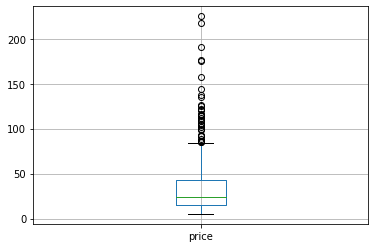

In [62]:
# Création d'un graphique boxplot (boîte à moustache) afin de repérer des valeurs abérrantes (outliers)
df_final.boxplot(column=['price'])

<AxesSubplot:xlabel='price', ylabel='total_sales'>

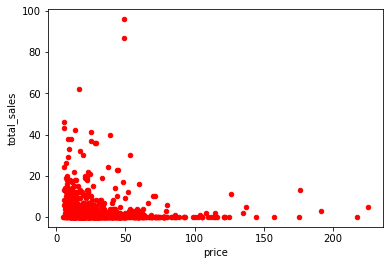

In [77]:
df_final.plot.scatter(x='price', y='total_sales', color='red')

## Traitement des outliers <a class="anchor" id="chapter4"></a>

In [64]:
# Calcul de l'écart inter-quartile
Q1 = df_final.price.quantile(0.25)
Q3 = df_final.price.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

27.9


In [65]:
# Calcul de la borne supérieure : Q3 + 1,5 × Ecart-interquartile
borne_sup = Q3 + 1.5 * IQR
print(borne_sup)

84.35


In [66]:
# Calcul de la borne inférieure : Q1−1,5 × Ecart-interquartile
borne_inf = Q1 - 1.5 * IQR
print(borne_inf)

-27.249999999999993


In [67]:
# Je crée une nouvelle dataframe avec mes outliers
liste_outliers = df_final.loc[(df_final['price']> 84.35) &(df_final['id_web'].notna()),:]

In [68]:
liste_outliers.shape

(32, 14)

In [69]:
liste_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 46 to 669
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_id              32 non-null     int64  
 1   id_web                  32 non-null     object 
 2   price                   32 non-null     float64
 3   total_sales             32 non-null     int64  
 4   ca_par_produit          32 non-null     float64
 5   post_name               32 non-null     object 
 6   stock_quantity          32 non-null     int64  
 7   onsale_web              32 non-null     int64  
 8   stock_status            32 non-null     object 
 9   tax_status              32 non-null     object 
 10  tax_class               0 non-null      float64
 11  post_type               32 non-null     object 
 12  post_type_doublon       32 non-null     object 
 13  post_mime_type_doublon  32 non-null     object 
dtypes: float64(3), int64(4), object(7)
memory 

In [70]:
# Tri de la dataframe à partir de la colonne 'price' en ordre décroissant
liste_outliers.sort_values('price', ascending= False).head()

,product_id,id_web,price,total_sales,ca_par_produit,post_name,stock_quantity,onsale_web,stock_status,tax_status,tax_class,post_type,post_type_doublon,post_mime_type_doublon
667,4352,15940,225.0,5,1125.0,champagne-egly-ouriet-grand-cru-millesime-2008,0,1,outofstock,taxable,NaN,product,attachment,image/jpeg
144,5001,14581,217.5,0,0.0,david-duband-charmes-chambertin-grand-cru-2014,20,1,instock,taxable,NaN,product,attachment,image/jpeg
350,5892,14983,191.3,3,573.9,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,10,1,instock,taxable,NaN,product,attachment,image/jpeg
644,4402,3510,176.0,13,2288.0,cognac-frapin-vip-xo,8,1,instock,taxable,NaN,product,attachment,image/jpeg
316,5767,15185,175.0,0,0.0,camille-giroud-clos-de-vougeot-2016,12,1,instock,taxable,NaN,product,attachment,image/jpeg


Recherche sur internet pour vérifier la concordance des prix :  

CHAMPAGNE EGLY-OURIET Grand cru millesime 2008 :  

https://www.enviedechamp.com/fr/champagne-egly-ouriet/2444-grand-cru-millesime-2008.html

<div>
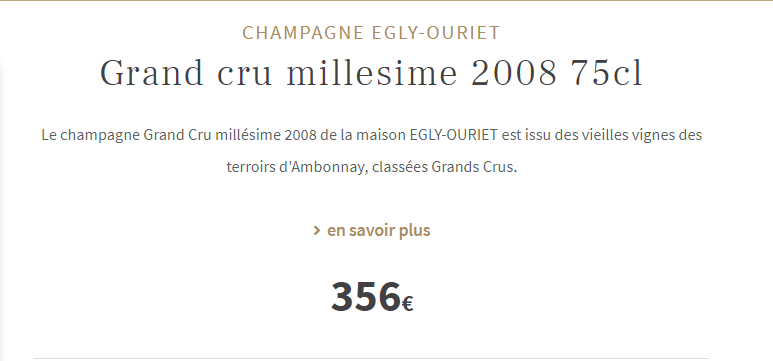
</div>

David Duband Charmes-Chambertin Grand Cru 2014 :  

https://www.nasti.vin/boutique/david-duband-charmes-chambertin-grand-cru-2014/

<div>
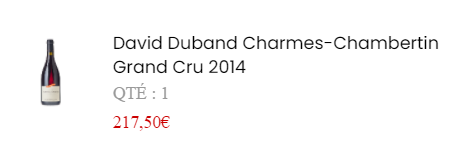
</div>

Cognac frapin vip XO :  

https://www.premiersgrandscrus.com/fr/cognac/251-frapin-vip-xo-cognac-grande-champagne-3275852498702.html

<div>
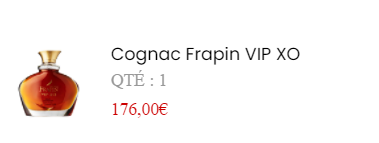
</div>


In [71]:
# Calcul du CA des outliers
liste_outliers.ca_par_produit.sum()

6970.0

In [72]:
# Calcul de la proportion des ventes des outliers
(liste_outliers.ca_par_produit.sum()*100)/df_final.ca_par_produit.sum()

9.876914094937408